In [3]:
#Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dictionary_fp = 'Data/dictionary.csv'
summer_olympic_medalists_fp = 'Data/Summer Olympic medallists 1896 to 2008 - ALL MEDALISTS.csv'
winter_fp = 'Data/winter.csv'

In [5]:
dictionary_data = pd.read_csv(dictionary_fp)

In [6]:
dictionary_data.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [27]:
# This file is delimited by spaces and not commas
# summer_medalists = pd.read_csv(summer_olympic_medalists_fp)
# summer_medalists.head()
winter_olympics = pd.read_csv(winter_fp)
winter_olympics.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [106]:
wint_oly = winter_olympics.set_index(winter_olympics['Year'])
usa_olympic_df = wint_oly[wint_oly.Country == "USA"]
usa_olympic_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
Year,,,,,,,,,
1924,1924,Chamonix,Ice Hockey,Ice Hockey,"ABEL, Clarence John",USA,Men,Ice Hockey,Silver
1924,1924,Chamonix,Ice Hockey,Ice Hockey,"DRURY, Herbert L.",USA,Men,Ice Hockey,Silver
1924,1924,Chamonix,Ice Hockey,Ice Hockey,"GERAN, N.",USA,Men,Ice Hockey,Silver
1924,1924,Chamonix,Ice Hockey,Ice Hockey,"LACROIX, Alphonse",USA,Men,Ice Hockey,Silver
1924,1924,Chamonix,Ice Hockey,Ice Hockey,"LANGLEY, John Arthur",USA,Men,Ice Hockey,Silver


In [104]:
df = usa_olympic_df.groupby('Year')

C:\Users\Ritter Gustave\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'Year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [105]:
# for year, oly_df in df:
#     print(year)
#     print(oly_df)
df.get_group(1924).head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
Year,,,,,,,,,
1924,1924,Chamonix,Ice Hockey,Ice Hockey,"ABEL, Clarence John",USA,Men,Ice Hockey,Silver
1924,1924,Chamonix,Ice Hockey,Ice Hockey,"DRURY, Herbert L.",USA,Men,Ice Hockey,Silver
1924,1924,Chamonix,Ice Hockey,Ice Hockey,"GERAN, N.",USA,Men,Ice Hockey,Silver
1924,1924,Chamonix,Ice Hockey,Ice Hockey,"LACROIX, Alphonse",USA,Men,Ice Hockey,Silver
1924,1924,Chamonix,Ice Hockey,Ice Hockey,"LANGLEY, John Arthur",USA,Men,Ice Hockey,Silver


In [36]:
medalList = []
for medal in df.get_group(2014)['Medal']:
    medalList.append(medal)
len(medalList)

65

In [103]:
listYear = []
for year in usa_olympic_df['Year']:
    if year not in listYear:
        listYear.append(year)

In [52]:
medals = []
currentYear = 1924
us_progress_data = {
    "data": []
}
temp_dict = {
    "Year": 0,
    "Medals": []
}

for year in listYear:
    for medal in df.get_group(year)['Medal']:
        if currentYear != year:
            medals = []
            currentYear = 1924
            temp_dict["Year"] = year
            temp_dict["Medals"] = []
        temp_dict['Year'] = year
        temp_dict['Medals'].append(medal)
        currentYear = year
    us_progress_data["data"].append(temp_dict.copy())
# print(temp_dict)
# us_progress_data.update(temp_dict)
# print(len(temp_dict['Medals']))

In [53]:
#    Gives Break down of
# print(us_progress_data)

{'data': [{'Year': 1924, 'Medals': ['Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Gold', 'Bronze']}, {'Year': 1928, 'Medals': ['Gold', 'Gold', 'Gold', 'Gold', 'Gold', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Gold', 'Silver', 'Bronze', 'Bronze']}, {'Year': 1932, 'Medals': ['Gold', 'Gold', 'Gold', 'Gold', 'Gold', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Gold', 'Gold', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Silver', 'Bronze', 'Silver', 'Silver', 'Gold', 'Gold', 'Gold', 'Silver', 'Gold']}, {'Year': 1936, 'Medals': ['Bronze', 'Bronze', 'Gold', 'Gold', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Bronze', 'Bronze']}, {'Year': 1948, 'Medals': ['Bronze', 'B

In [61]:
us_progress_data['data'][2]

{'Medals': ['Gold',
  'Gold',
  'Gold',
  'Gold',
  'Gold',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Bronze',
  'Bronze',
  'Bronze',
  'Bronze',
  'Bronze',
  'Bronze',
  'Gold',
  'Gold',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Silver',
  'Bronze',
  'Silver',
  'Silver',
  'Gold',
  'Gold',
  'Gold',
  'Silver',
  'Gold'],
 'Year': 1932}

In [64]:
y = []
for year in listYear:
    for data in us_progress_data['data']:
        if year == data['Year']:
            y.append(len(data['Medals']))

In [66]:
print(listYear)
print(y)

[1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014]
[13, 14, 45, 16, 16, 30, 26, 27, 8, 7, 25, 11, 30, 9, 7, 14, 21, 34, 84, 53, 98, 65]


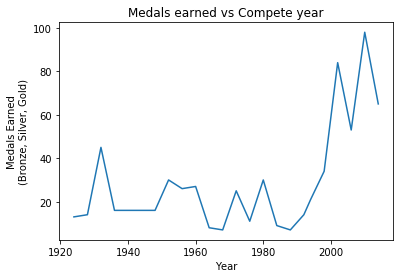

In [80]:
plt.plot(listYear, y)
plt.xlabel('Year')
plt.ylabel('Medals Earned\n(Bronze, Silver, Gold)')
plt.title('Medals earned vs Compete year')
plt.show()
plt.savefig('Medals Earned vs Compete Year.png')

22


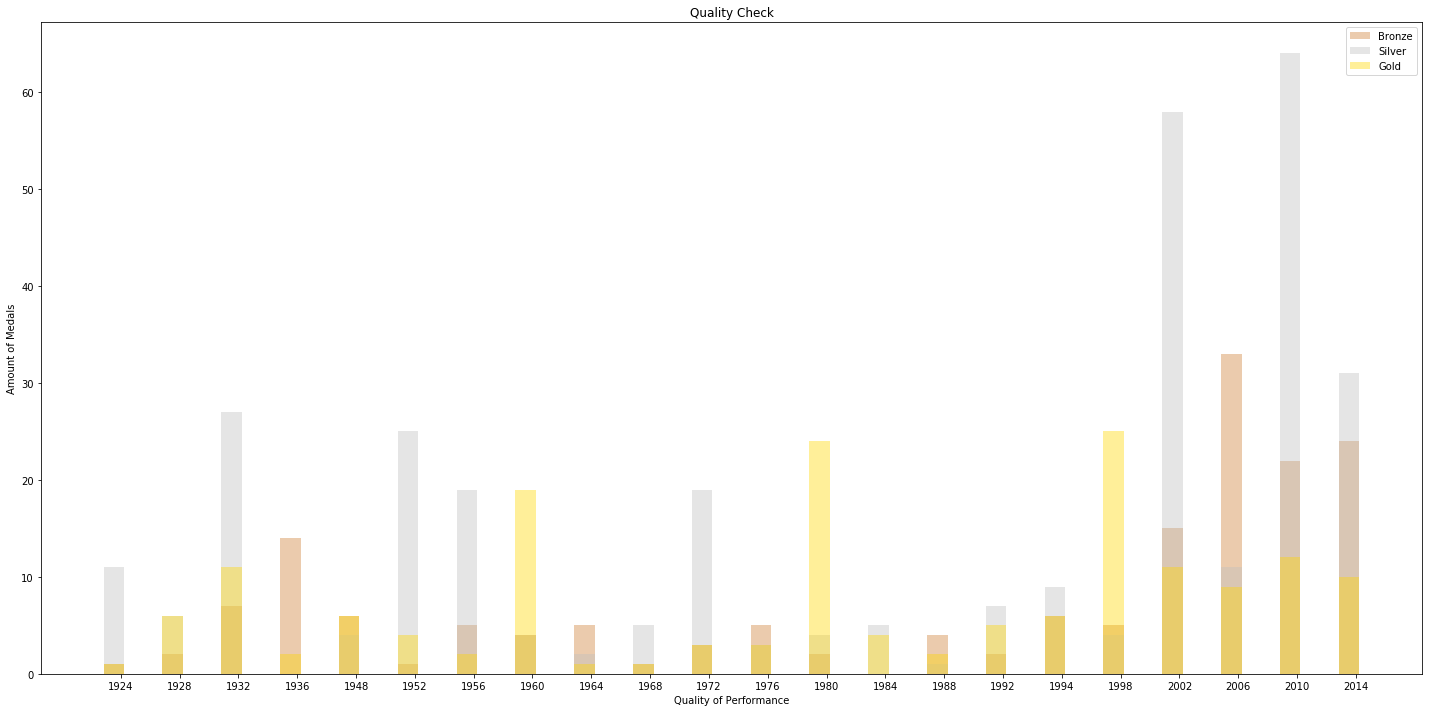

In [102]:
num_of_groups = len(listYear)
print(num_of_groups)
bronzelist = []
silverlist = []
goldlist = []
for year in listYear:
    for data in us_progress_data['data']:
        if year == data['Year']:
            bronzelist.append(data['Medals'].count('Bronze'))
            silverlist.append(data['Medals'].count('Silver'))
            goldlist.append(data['Medals'].count('Gold'))


fig, ax = plt.subplots(figsize=(20,10))
index = np.arange(num_of_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, bronzelist, bar_width, alpha = opacity, color = '#cd7f32',
               error_kw = error_config, label = 'Bronze')
rects2 = ax.bar(index, silverlist, bar_width, alpha = opacity, color = '#c0c0c0',
               error_kw = error_config, label = 'Silver')
rects3 = ax.bar(index, goldlist, bar_width, alpha = opacity, color = '#ffd700',
               error_kw = error_config, label = 'Gold')

ax.set_xlabel('Quality of Performance')
ax.set_ylabel('Amount of Medals')
ax.set_title('Quality Check')
ax.set_xticks(index + bar_width / 3)
ax.set_xticklabels(listYear)
ax.legend()

fig.tight_layout()
plt.show()